In [1]:
#importing library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sf
from imblearn.over_sampling import SMOTE

In [2]:
#importing Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

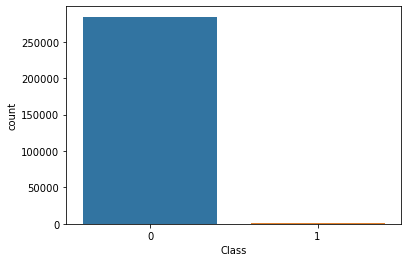

In [8]:
sf.countplot(df['Class'])

In [9]:
x = df.iloc[:,:-1]

In [10]:
y = df.iloc[:,30]

In [11]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [12]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [13]:
df_fraud = df.loc[df.Class == 1] 
df_non_fraud = df.loc[df.Class == 0]

In [14]:
#SMOTE_OVERSAMPLE
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x, y)

In [15]:
#Train
xtrain,xtest,ytrain,ytest = train_test_split(x_res,y_res,test_size=.25, random_state=42)

In [16]:
#ROC
def plot_roc_auc(ytest, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(ytest, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [17]:
#base accuracy
print("Base accuracy score we must beat is: ", 
      df_non_fraud.Class.count()/ np.add(df_non_fraud.Class.count(),df_fraud.Class.count()) * 100)

Base accuracy score we must beat is:  99.82725143693798


In [18]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [19]:
DT = DecisionTreeClassifier()

In [20]:
DT.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [21]:
Dt_pred = DT.predict(xtest)

In [22]:
Dt_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [23]:
accuracy_score(ytest,Dt_pred)

0.9984102196147948

In [24]:
confusion_matrix(ytest,Dt_pred)

array([[70844,   179],
       [   47, 71088]], dtype=int64)

In [25]:
print(classification_report(ytest,Dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71023
           1       1.00      1.00      1.00     71135

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



In [26]:
cm = confusion_matrix(ytest,Dt_pred)

<AxesSubplot:>

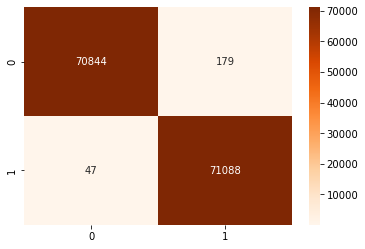

In [27]:
sf.heatmap(cm,annot=True,cmap="Oranges",fmt="d",cbar=True, annot_kws={"size":10})

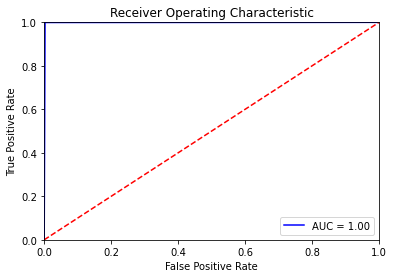

In [28]:
plot_roc_auc(ytest, DT.predict_proba(xtest)[:,1])

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
LRG = LogisticRegression()

In [31]:
LRG.fit(xtrain,ytrain)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
lrg_pred = LRG.predict(xtest)

In [34]:
lrg_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [35]:
accuracy_score(ytest,lrg_pred)

0.9737123482322486

In [36]:
confusion_matrix(ytest,lrg_pred)

array([[69762,  1261],
       [ 2476, 68659]], dtype=int64)

In [37]:
print(classification_report(ytest,lrg_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     71023
           1       0.98      0.97      0.97     71135

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158



In [40]:
cm = confusion_matrix(ytest,lrg_pred)

<AxesSubplot:>

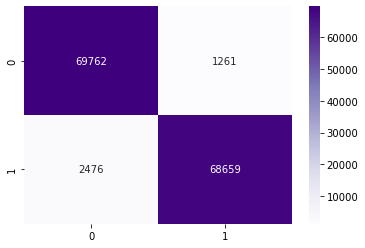

In [41]:
sf.heatmap(cm,annot=True,cmap="Purples",fmt="d",cbar=True, annot_kws={"size":10})

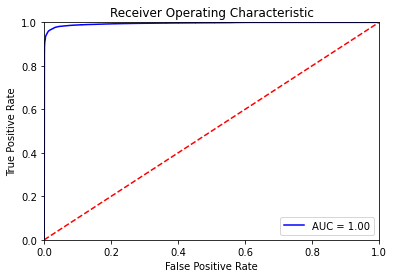

In [44]:
plot_roc_auc(ytest, LRG.predict_proba(xtest)[:,1])

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
Rf = RandomForestClassifier()

In [47]:
Rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [48]:
rf_pred = Rf.predict(xtest)

In [49]:
rf_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [50]:
accuracy_score(ytest,rf_pred)

0.9999085524557183

In [51]:
confusion_matrix(ytest,rf_pred)

array([[71010,    13],
       [    0, 71135]], dtype=int64)

In [52]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71023
           1       1.00      1.00      1.00     71135

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



In [53]:
cm = confusion_matrix(ytest,rf_pred)

<AxesSubplot:>

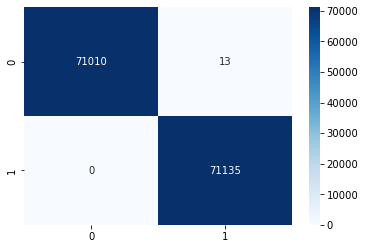

In [54]:
sf.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size":10})

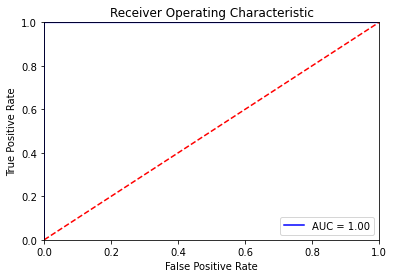

In [56]:
plot_roc_auc(ytest, Rf.predict_proba(xtest)[:,1])

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
GNB = GaussianNB()

In [59]:
GNB.fit(xtrain,ytrain)

GaussianNB()

In [60]:
gnb_pred = GNB.predict(xtest)

In [61]:
gnb_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
accuracy_score(ytest,gnb_pred)

0.8687094641173905

In [63]:
confusion_matrix(ytest,gnb_pred)

array([[70472,   551],
       [18113, 53022]], dtype=int64)

In [64]:
print(classification_report(ytest,gnb_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88     71023
           1       0.99      0.75      0.85     71135

    accuracy                           0.87    142158
   macro avg       0.89      0.87      0.87    142158
weighted avg       0.89      0.87      0.87    142158



In [65]:
cm = confusion_matrix(ytest,gnb_pred)

<AxesSubplot:>

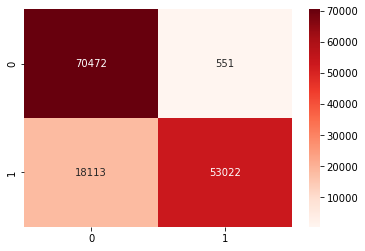

In [66]:
sf.heatmap(cm,annot=True,cmap="Reds",fmt="d",cbar=True, annot_kws={"size":10})

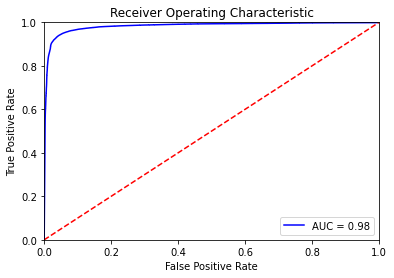

In [67]:
plot_roc_auc(ytest, GNB.predict_proba(xtest)[:,1])

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier(n_neighbors=5,p=1)

In [70]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(p=1)

In [71]:
knn_pred = knn.predict(xtest)

In [72]:
knn_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [73]:
accuracy_score(ytest,knn_pred)

0.9857974929304014

In [75]:
confusion_matrix(ytest,knn_pred)

array([[69236,  1787],
       [  232, 70903]], dtype=int64)

In [76]:
print(classification_report(ytest,knn_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71023
           1       0.98      1.00      0.99     71135

    accuracy                           0.99    142158
   macro avg       0.99      0.99      0.99    142158
weighted avg       0.99      0.99      0.99    142158



In [77]:
cm = confusion_matrix(ytest,knn_pred)

<AxesSubplot:>

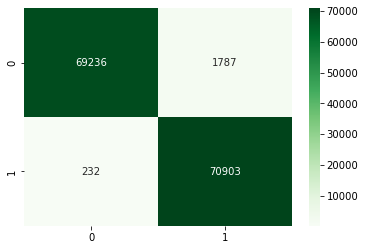

In [78]:
sf.heatmap(cm,annot=True,cmap="Greens",fmt="d",cbar=True, annot_kws={"size":10})

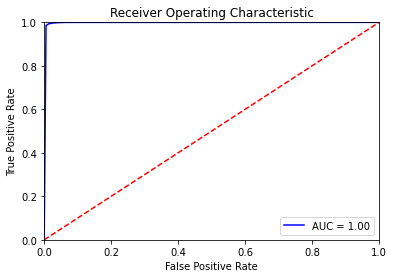

In [80]:
plot_roc_auc(ytest, knn.predict_proba(xtest)[:,1])